## Networks

**!!!Completly finished the 3rd task with watts_strogatz graph model**

Further materials are in `/home/course/networks`

1. Create a random network (with N>10.000 nodes) using the Barabasi-Albert model, and create a meaningful plot of the degree distribution!
Once the network is ready, gradually swap edges between nodes and track the change of the network topology by looking at the changes in the degree distribution!

2. Construct a network from referencing webpages! E.g. choose webpage of the Dept. of Complex Systems as the first node of the network and create new nodes and links from the "href" references! Make a visualisation of the growing network as the diameter of the network increases! (Diameter of a graph is the maximal distance between the nodes of the network. The distance between two nodes is measured by the number of steps along the shortest path connecting the node pair.

3. During reconnecting (swapping) links between nodes, usually we need a constant quantity, which does not change during the swapping of links. E.g. one can fix the degree distribution by setting a constraint at each node, how many incoming/outgoing connection it must have. Create small networks (N<50 nodes), which are randomized with swapping the links constraining the degrees of each node. By creating a visual representation of the network track the changes of swapping of the links! Show some examples, where this type of randomization does not change the topology of the network at all.

**Create a random network (with N>10.000 nodes) using the Barabasi-Albert model, and create a meaningful plot of the degree distribution!
Once the network is ready, gradually swap edges between nodes and track the change of the network topology by looking at the changes in the degree distribution!**

In [1]:
import networkx as nx

In [2]:
#Checking the barabasi_albert_graph
n = 100
m = 10
G = nx.barabasi_albert_graph(n, m)

In [3]:
#Random
import matplotlib.pyplot as plt

nx.draw_random(G, node_size=200, node_color = 'orange', with_labels=bool)
plt.savefig('random_barabasi_albert_graph.png')

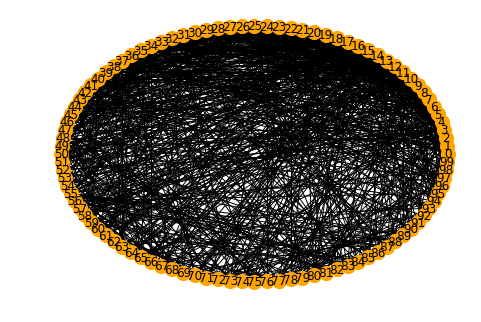

In [4]:
#Circle
nx.draw_circular(G, node_size=200, node_color = 'orange', with_labels=bool)
plt.savefig('cirle_barabasi_albert_graph.png')

In [5]:
n = 10000
m = 50
G = nx.barabasi_albert_graph(n, m)

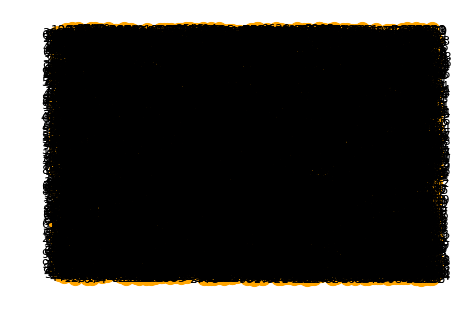

In [6]:
nx.draw_random(G, node_size=200, node_color = 'orange', with_labels=bool)
plt.savefig('big_barabasi_albert_graph.png')

In [7]:
import matplotlib.pyplot as plt
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins = 200, log = True)
    plt.show()

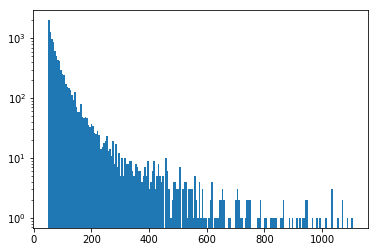

In [8]:
plot_degree_dist(G)

In [9]:
# nswap (integer (optional, default=1)) – Number of double-edge swaps to perform
# seed (integer, random_state, or None (default)) – Indicator of random number generation state

G = nx.double_edge_swap(G, nswap=1, max_tries=10000, seed=12345)

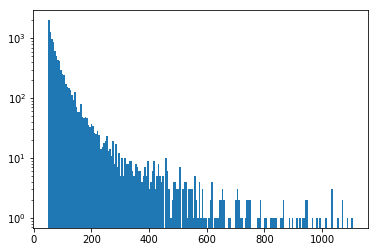

In [10]:
plot_degree_dist(G)

In [11]:
# Average degree of every node
def avg_neigh_degree(G):
    data = {}
    for n in G.nodes():
        if G.degree(n):
            data[n] = float(sum(G.degree(i) for i in G[n]))/G.degree(n)
    return data

In [12]:
avg_deg = avg_neigh_degree(G)
avg_deg

{0: 184.55408970976254,
 1: 191.10243902439024,
 2: 219.1478494623656,
 3: 212.17169373549885,
 4: 193.0079051383399,
 5: 188.70998415213947,
 6: 190.52650822669105,
 7: 187.50935550935552,
 8: 186.27611940298507,
 9: 207.2190889370933,
 10: 199.91929133858267,
 11: 221.76363636363635,
 12: 187.96724890829694,
 13: 193.4375,
 14: 205.635593220339,
 15: 208.4828375286041,
 16: 193.02329749103941,
 17: 195.2,
 18: 196.0356234096692,
 19: 192.52871287128713,
 20: 178.5173076923077,
 21: 189.9124726477024,
 22: 186.0278422273782,
 23: 202.7925407925408,
 24: 204.1462829736211,
 25: 201.79826464208242,
 26: 203.7804232804233,
 27: 203.16397849462365,
 28: 198.1688888888889,
 29: 213.61320754716982,
 30: 206.82575757575756,
 31: 196.68097014925374,
 32: 203.7775119617225,
 33: 184.59027777777777,
 34: 201.89675516224187,
 35: 213.8132530120482,
 36: 198.32150776053214,
 37: 193.46732673267326,
 38: 187.459793814433,
 39: 186.17718940936862,
 40: 175.2297592997812,
 41: 210.36425339366517,
 4

**Construct a network from referencing webpages! E.g. choose webpage of the Dept. of Complex Systems as the first node of the network and create new nodes and links from the "href" references! Make a visualisation of the growing network as the diameter of the network increases! (Diameter of a graph is the maximal distance between the nodes of the network. The distance between two nodes is measured by the number of steps along the shortest path connecting the node pair.**

In [13]:
G_weighted = nx.Graph()

#Main
G_weighted.add_edge('Main','People', weight='https://fizika.elte.hu/en/index.php?page=tanszek&tid=4&sub=mk')
G_weighted.add_edge('Main','Institute of Physics', weight='https://fizika.elte.hu/en/index.php')
G_weighted.add_edge('Main','Eötvös Loránd University', weight='https://www.elte.hu/en/')
G_weighted.add_edge('Main','How to visit us', weight='https://complex.elte.hu/visit.html')

#Institute of Physics
G_weighted.add_edge('Institute of Physics','News', weight='https://fizika.elte.hu/en/index.php?page=hirek_main')
G_weighted.add_edge('Institute of Physics','Teaching',weight='https://fizika.elte.hu/en/index.php?page=content&cid=1')
G_weighted.add_edge('Institute of Physics','Research', weight='https://fizika.elte.hu/en/index.php?page=content&cid=2')
G_weighted.add_edge('Institute of Physics','Contact',weight='https://fizika.elte.hu/en/index.php?page=content&cid=1#')


#Eötvös Loránd University
G_weighted.add_edge('Eötvös Loránd University','News', weight='https://www.elte.hu/en/news')

G_weighted.add_edge('Eötvös Loránd University','News/Events', weight='https://www.elte.hu/en/event')
G_weighted.add_edge('News/Events','Eötvös Loránd University', weight='https://www.elte.hu/en/news')

G_weighted.add_edge('Eötvös Loránd University','News/Interviews', weight='https://www.elte.hu/en/interviews')
G_weighted.add_edge('News/Interviews', 'Eötvös Loránd University', weight='https://www.elte.hu/en/interviews')

G_weighted.add_edge('Eötvös Loránd University','News/Calls_for_applic', weight='https://www.elte.hu/en/calls-for-applications')
G_weighted.add_edge('News/Calls_for_applic', 'Eötvös Loránd University', weight='https://www.elte.hu/en/calls-for-applications')

G_weighted.add_edge('Eötvös Loránd University','Education', weight='https://www.elte.hu/en/academic-system')
G_weighted.add_edge('Education', 'Eötvös Loránd University', weight='https://www.elte.hu/en/academic-system')

G_weighted.add_edge('Eötvös Loránd University','Education/Summer_Universoty', weight='https://www.elte.hu/en/summer-university')
G_weighted.add_edge('Education/Summer_Universoty','Eötvös Loránd University', weight='https://www.elte.hu/en/summer-university')

G_weighted.add_edge('Eötvös Loránd University','Education/Meet-our-students', weight='https://www.elte.hu/en/meet-our-students')
G_weighted.add_edge('Education/Meet-our-students','Eötvös Loránd University', weight='https://www.elte.hu/en/meet-our-students')

G_weighted.add_edge('Eötvös Loránd University','Education/MEET US IN YOUR COUNTRY', weight='https://www.elte.hu/en/meet-us-in-your-country?m=394')
G_weighted.add_edge('Education/MEET US IN YOUR COUNTRY','Eötvös Loránd University', weight='https://www.elte.hu/en/meet-us-in-your-country?m=394')

G_weighted.add_edge('Eötvös Loránd University','Education/Outgoing Mobility',weight='https://www.elte.hu/en/meet-us-in-your-country?m=394')

G_weighted.add_edge('Eötvös Loránd University','Education/Languadge courses',weight='https://www.elte.hu/en/language-courses')

G_weighted.add_edge('Eötvös Loránd University','Education/INTERNATIONAL STUDENT AMBASSADORS',weight='https://www.elte.hu/en/international-student-ambassadors')

G_weighted.add_edge('Eötvös Loránd University','Education/Visit_Us',weight='https://www.elte.hu/en/visit-us')

#Visit us
G_weighted.add_node('https://complex.elte.hu/visit.html')



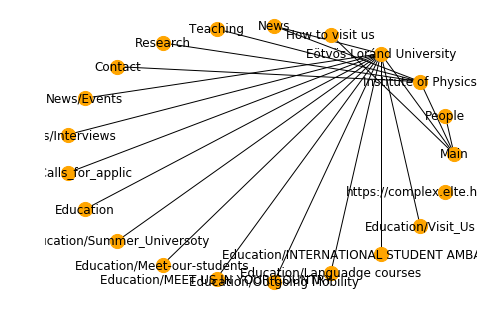

In [14]:
nx.draw_circular(G_weighted, node_size=200, node_color = 'orange', with_labels=bool)


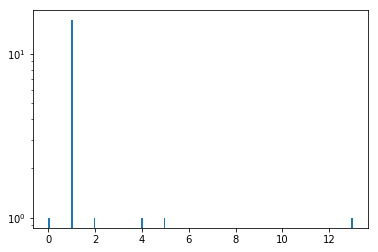

In [15]:
plot_degree_dist(G_weighted)

In [16]:
G_weighted_swap = nx.double_edge_swap(G_weighted, nswap=1)

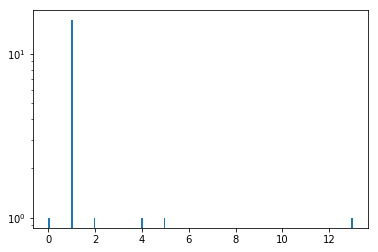

In [17]:
plot_degree_dist(G_weighted_swap)

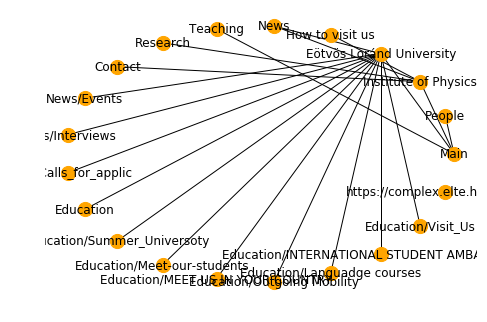

In [18]:
nx.draw_circular(G_weighted_swap, node_size=200, node_color = 'orange', with_labels=bool)


In [19]:
#The way to calculate shortest way, etc, should increase the number of edges!

nx.shortest_path_length(G_weighted, source='Main', target='How to visit us', weight=None)

2

**During reconnecting (swapping) links between nodes, usually we need a constant quantity, which does not change during the swapping of links. E.g. one can fix the degree distribution by setting a constraint at each node, how many incoming/outgoing connection it must have. Create small networks (N<50 nodes), which are randomized with swapping the links constraining the degrees of each node. By creating a visual representation of the network track the changes of swapping of the links! Show some examples, where this type of randomization does not change the topology of the network at all.**

In [20]:
G_generetated = nx.complete_graph(40)

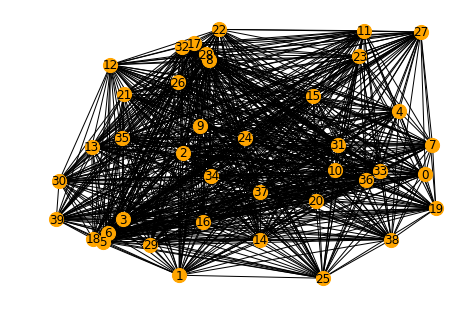

In [21]:
nx.draw_random(G_generetated, node_size=200, node_color = 'orange', with_labels=bool)

In [22]:
# degree_list = G_generetated.degree()
# H = nx.expected_degree_graph(degree_list)

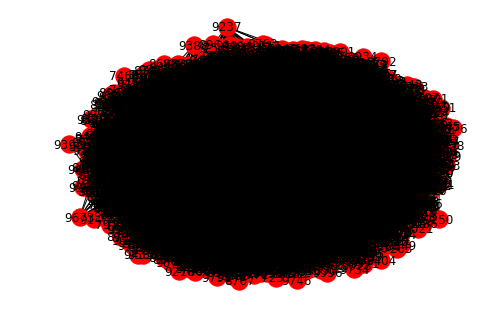

In [23]:
G_last = nx.erdos_renyi_graph(50,0.5) 
nx.draw(G, with_labels=True) 
plt.show() 

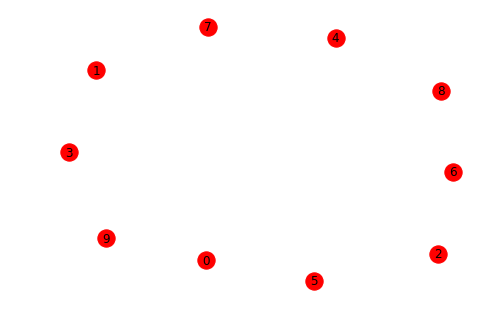

In [24]:
I = nx.erdos_renyi_graph(10,0) 
nx.draw(I, with_labels=True) 
plt.show() 

In [25]:
def average_clustering(G, trials=1000): 
        n = len(G) 
        triangles = 0
        nodes = G.nodes() 
        for i in [int(random.random() * n) for i in range(trials)]: 
            nbrs = list(G[nodes[i]]) 
            if len(nbrs) < 2: 
                continue
            u, v = random.sample(nbrs, 2) 
            if u in G[v]: 
                triangles += 1
        return triangles / float(trials)

In [26]:
import networkx as nx 
G = nx.erdos_renyi_graph(10,0.4) 
cc = nx.average_clustering(G) 
cc 

0.43

In [27]:
c = nx.clustering(G) 
c  

{0: 0.4,
 1: 0.3,
 2: 0.3,
 3: 0.3,
 4: 0,
 5: 1.0,
 6: 1.0,
 7: 0.3333333333333333,
 8: 0,
 9: 0.6666666666666666}

In [154]:
#Timeout
#!jupyter-nbconvert --execute worksheet.ipynb

**Last version of the 3rd task. I will use Watts Strogatz graph model**

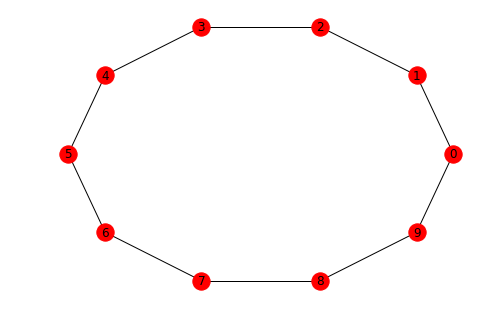

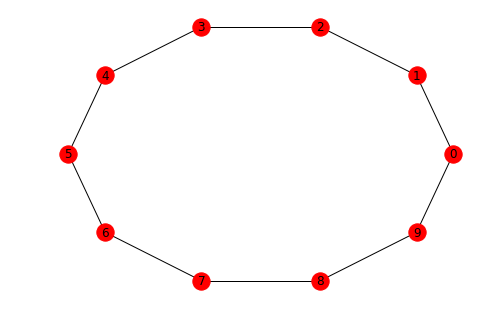

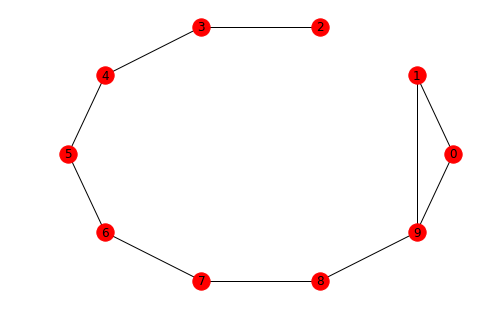

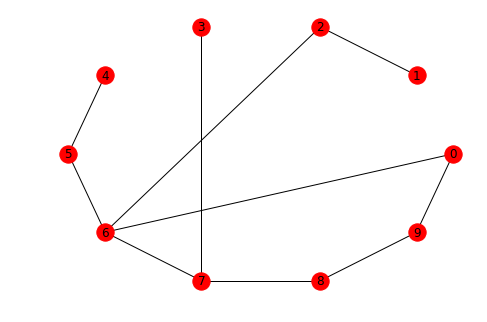

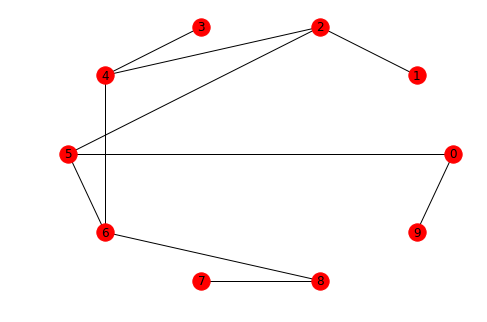

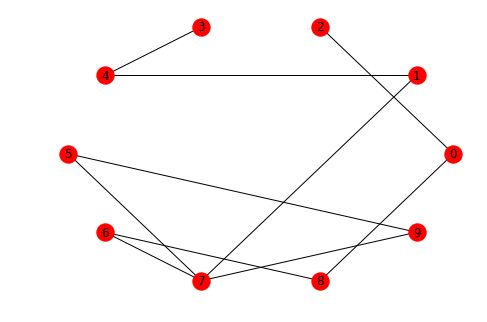

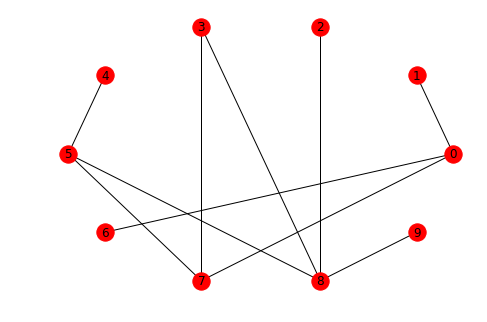

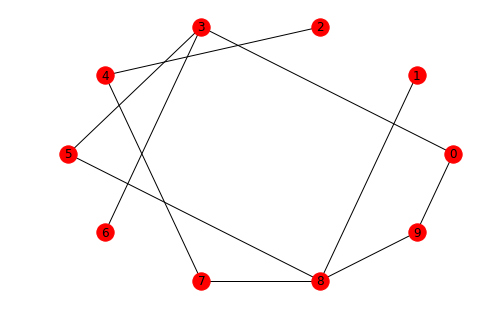

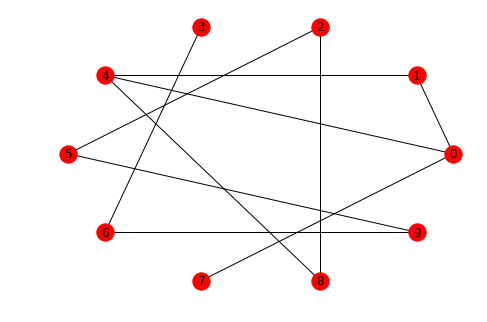

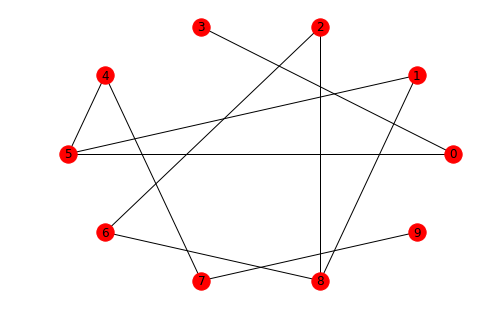

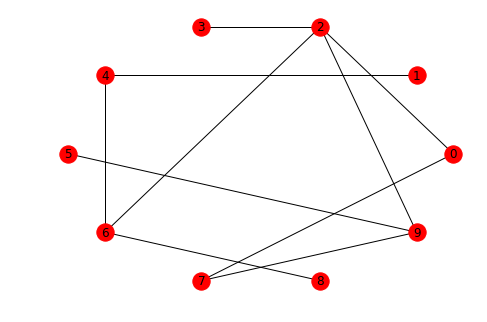

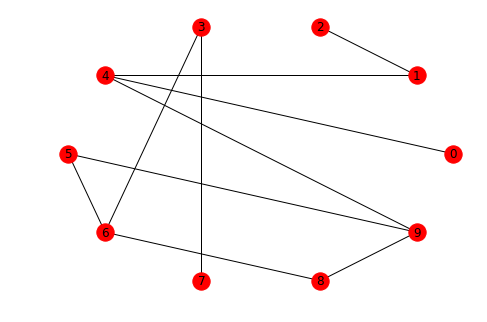

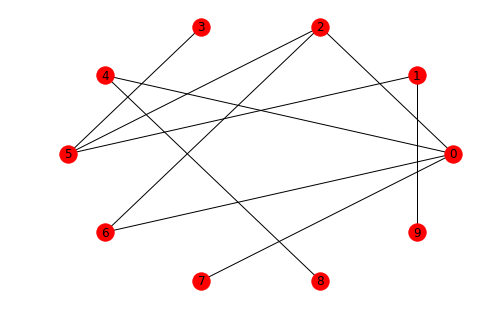

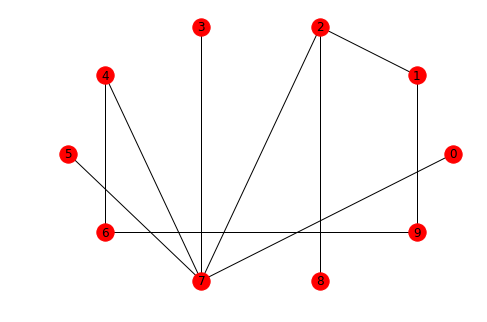

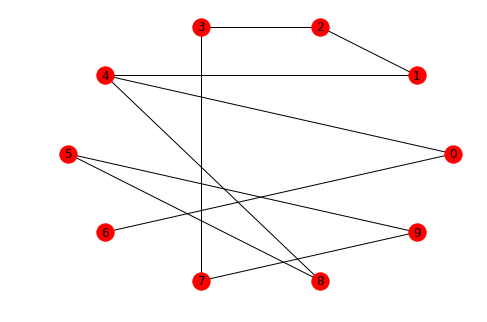

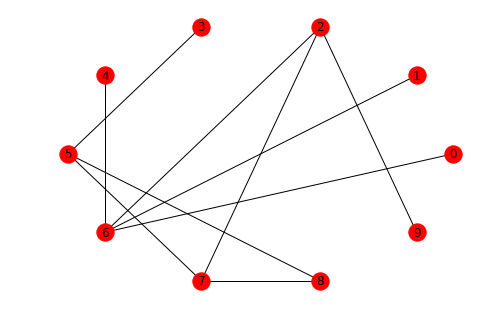

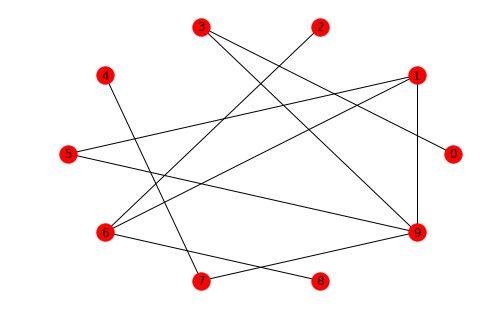

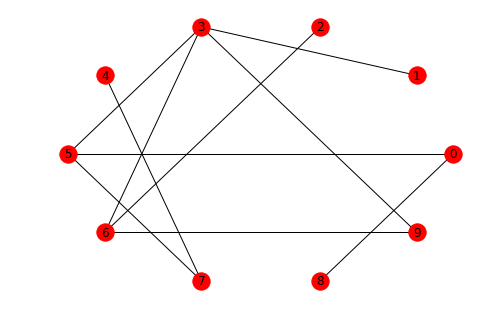

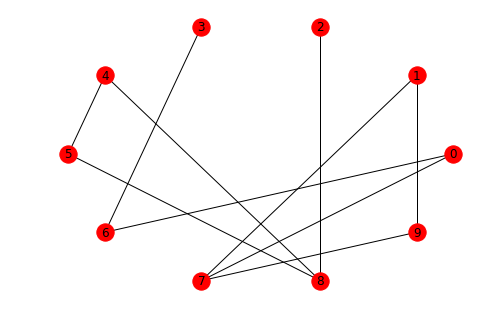

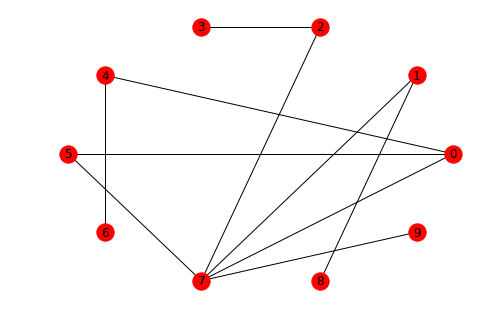

In [36]:
import numpy as np
%matplotlib inline
import matplotlib.gridspec as gridspec


for p in np.linspace(0,2,20):
    watts_strogatz = nx.watts_strogatz_graph(10,2, p = p)
    #f'Have a look on a graph'
    nx.draw_circular(watts_strogatz, with_labels=True) 
    plt.show()

    

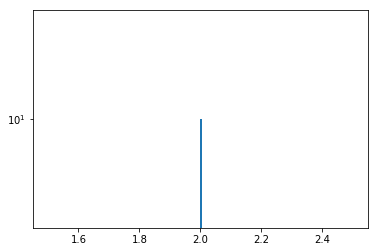

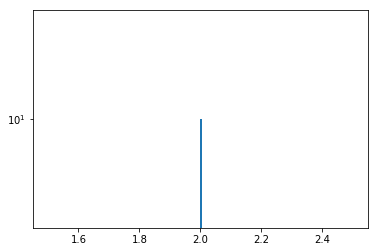

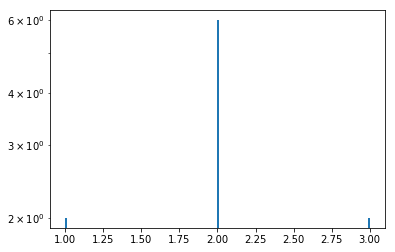

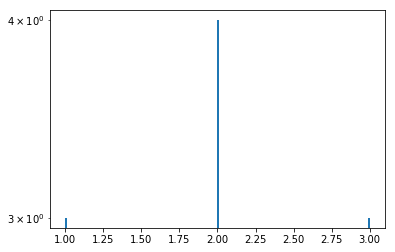

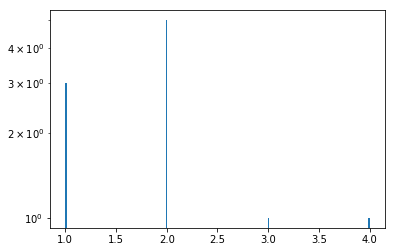

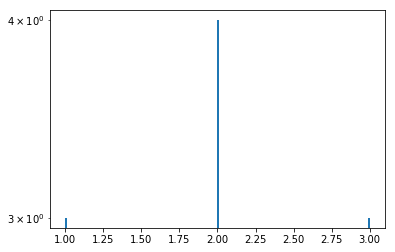

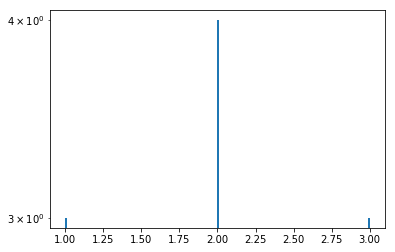

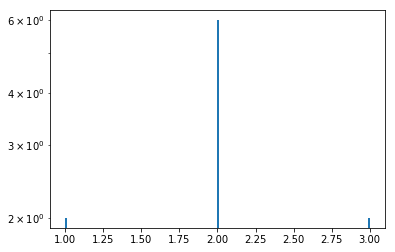

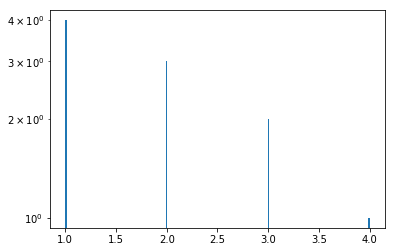

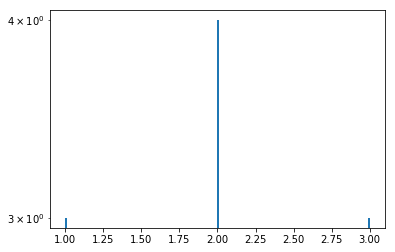

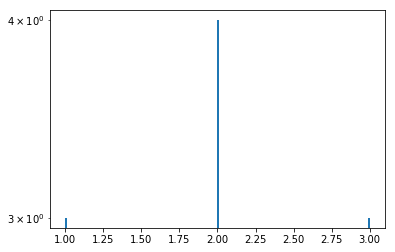

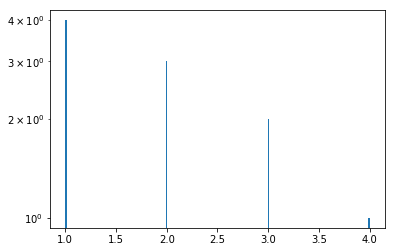

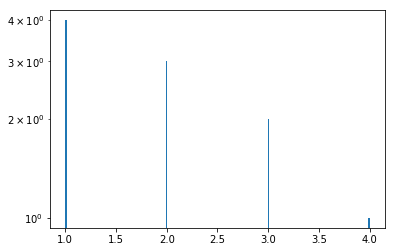

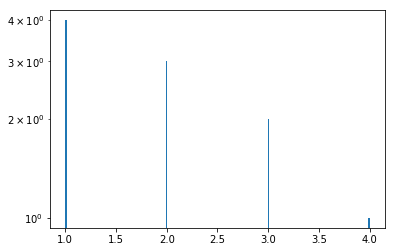

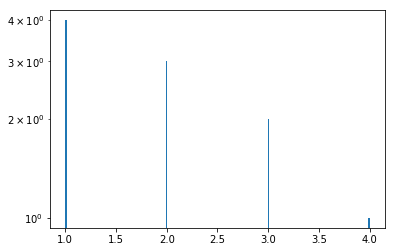

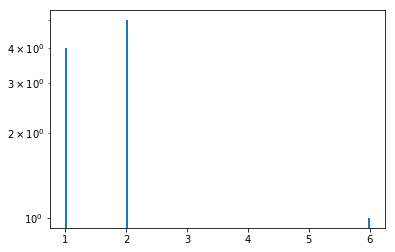

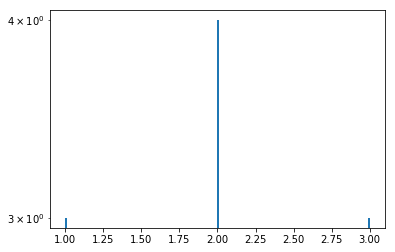

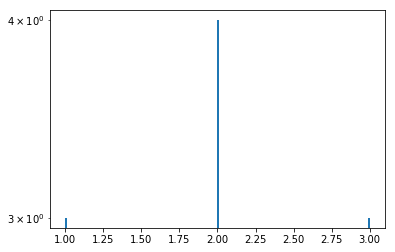

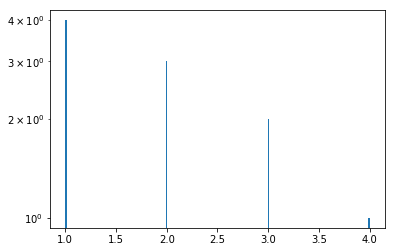

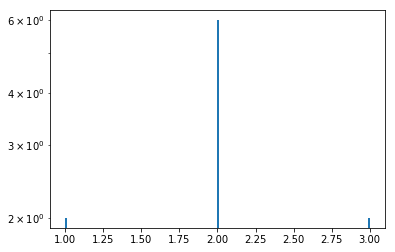

In [41]:
#f'Have a look on a nodes'
#f'Have a look on a nodes distribution'

for p in np.linspace(0,2,20):
    watts_strogatz = nx.watts_strogatz_graph(10,2, p = p)
    plot_degree_dist(watts_strogatz)
    nx.nodes(watts_strogatz)



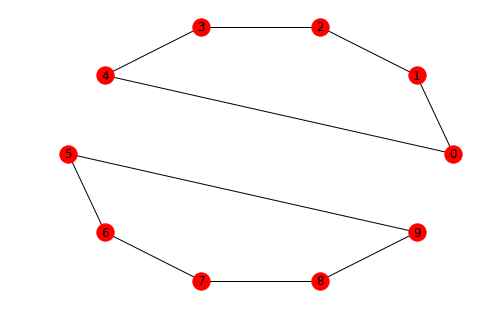

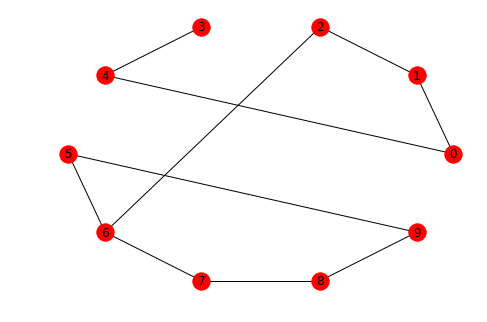

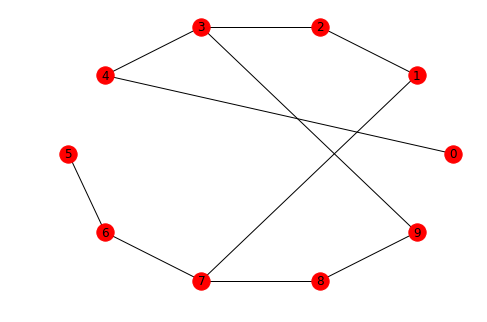

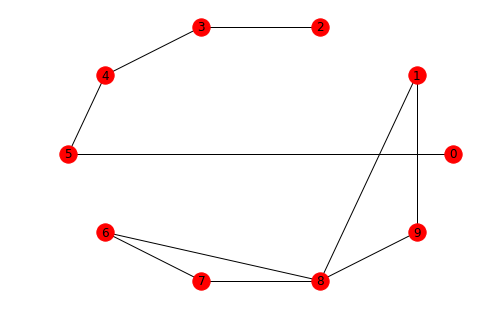

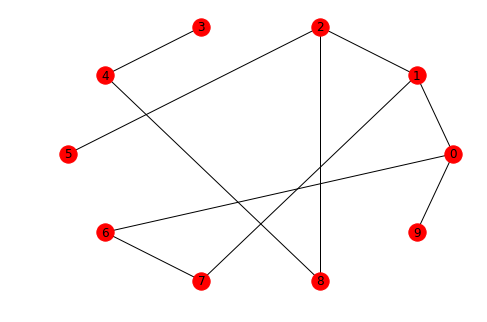

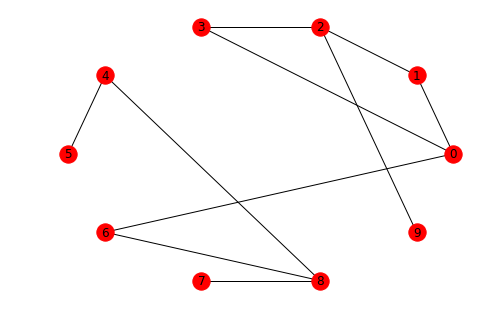

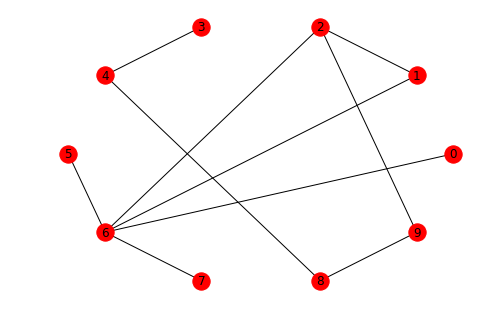

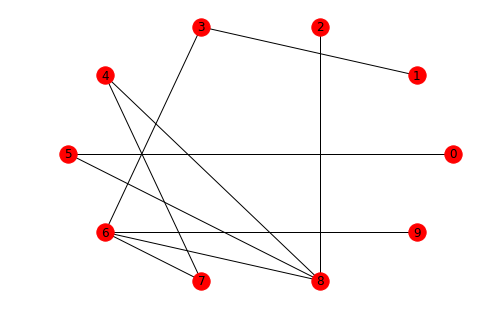

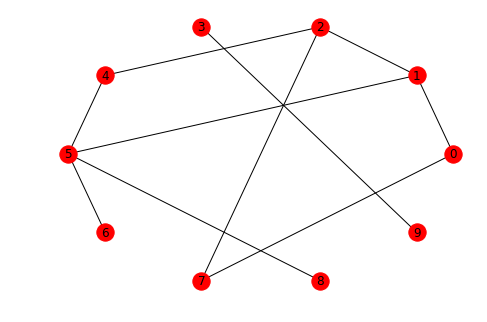

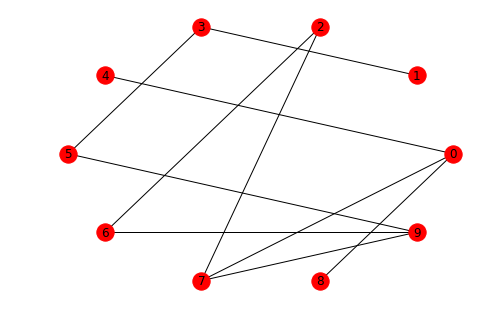

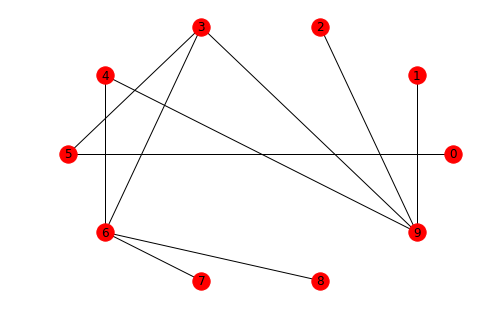

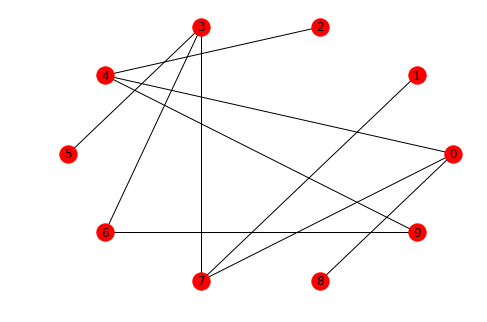

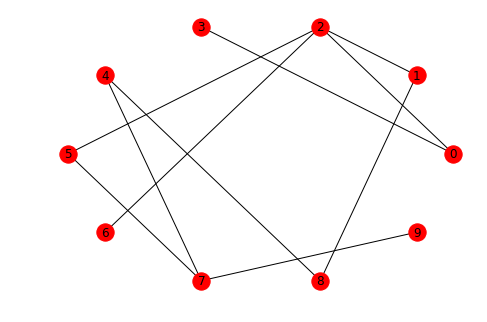

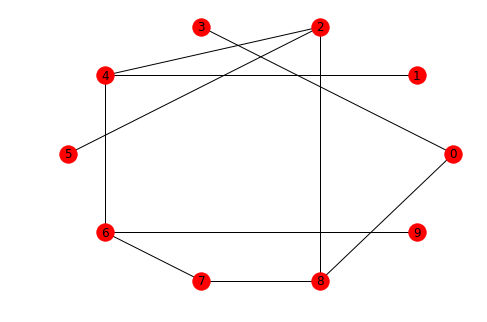

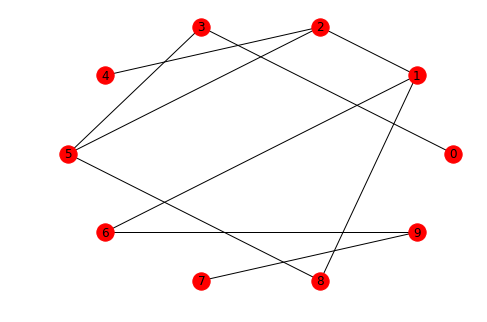

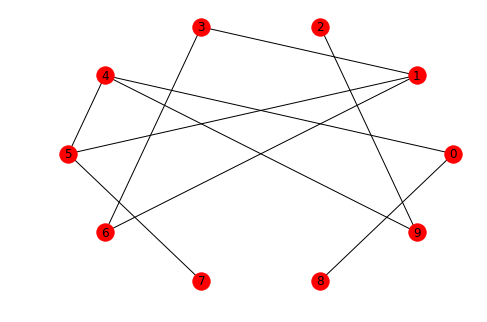

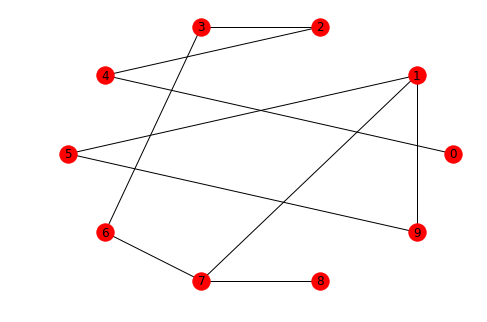

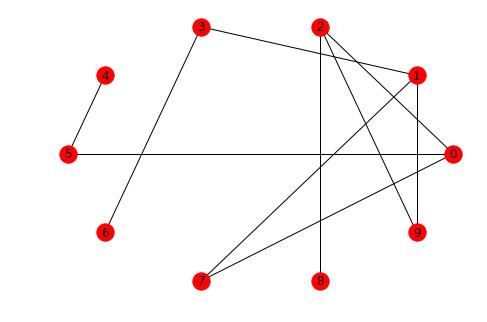

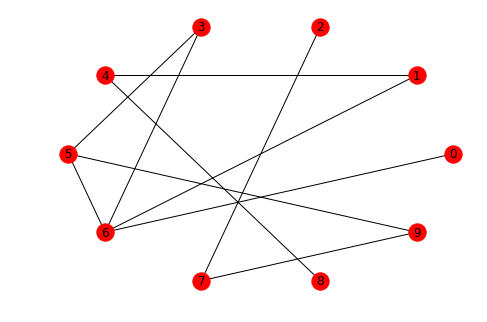

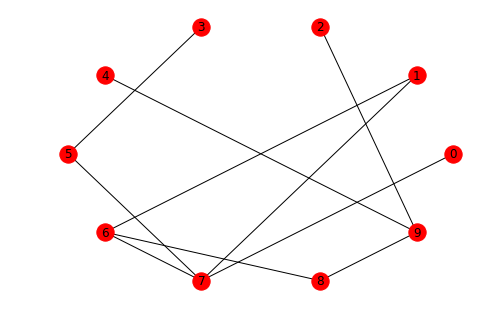

In [48]:
#Try to change use swap
#Here we can see different way of making connections not just because of the probability but also the swapping
#Finished graph
for p in np.linspace(0,2,20):
    watts_strogatz = nx.watts_strogatz_graph(10,2, p = p)
    watts_strogatz = nx.double_edge_swap(watts_strogatz, nswap=1, max_tries=10000, seed=12345)
    #f'Have a look on a graph'
    nx.draw_circular(watts_strogatz, with_labels=True)
    plt.show()

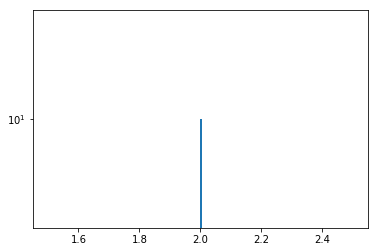

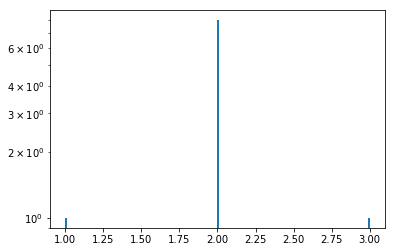

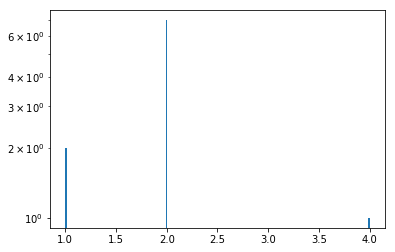

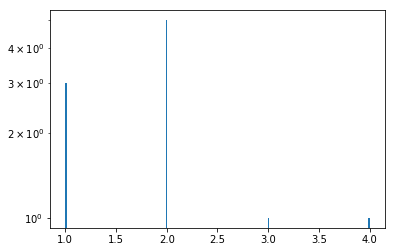

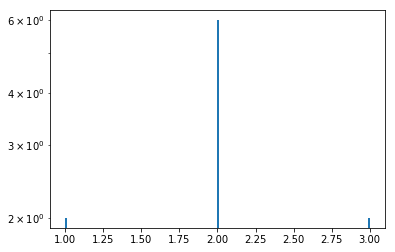

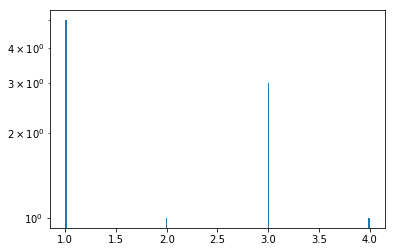

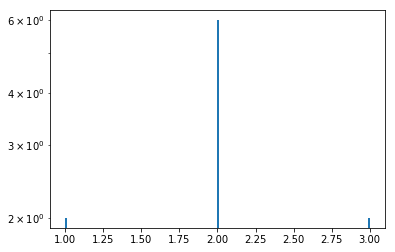

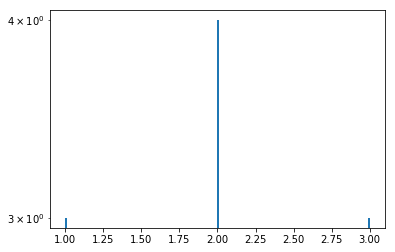

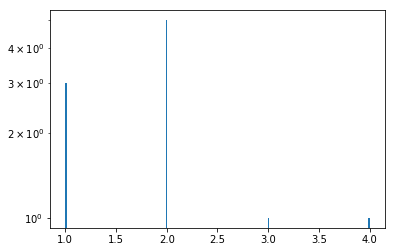

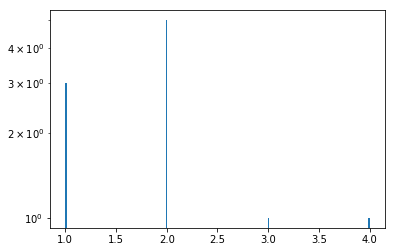

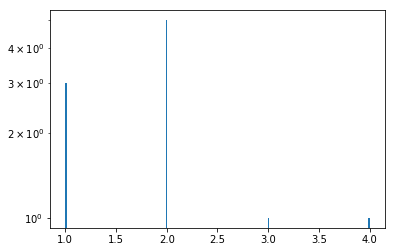

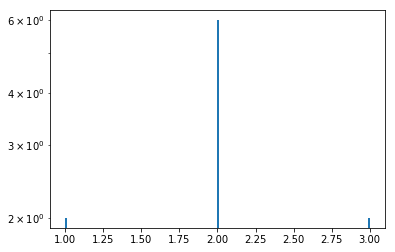

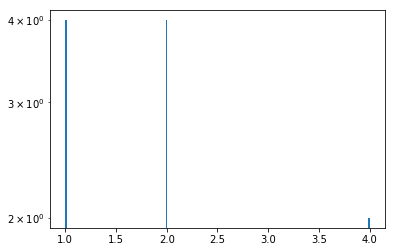

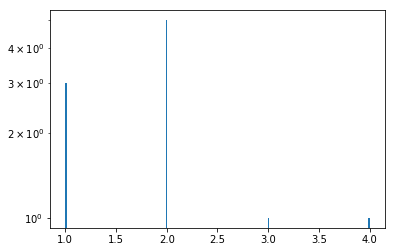

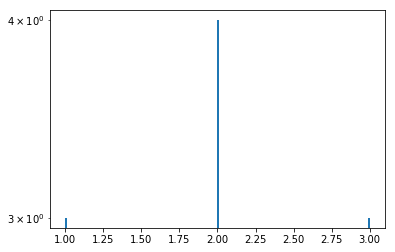

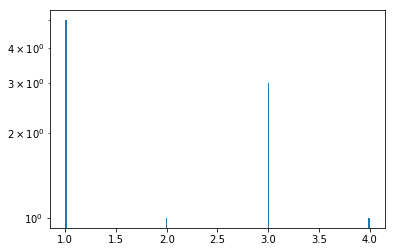

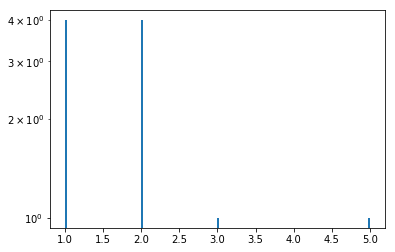

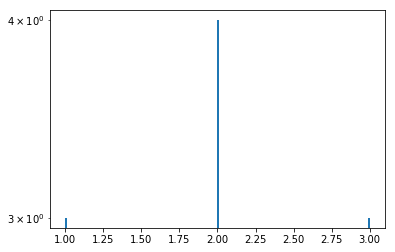

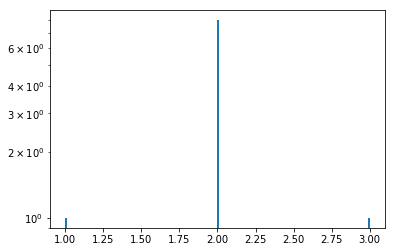

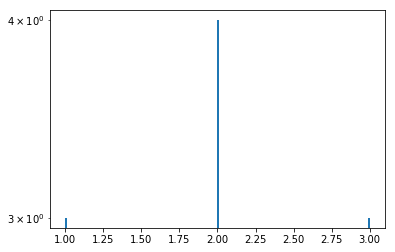

In [49]:
for p in np.linspace(0,2,20):
    watts_strogatz = nx.watts_strogatz_graph(10,2, p = p)
    plot_degree_dist(watts_strogatz)